In [1]:
# Importing essential libraries
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt


In [2]:
# Loading the dataset
df = pd.read_csv(r'diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [6]:
df.sum()

Pregnancies                  2953.000
Glucose                     92847.000
BloodPressure               53073.000
SkinThickness               15772.000
Insulin                     61286.000
BMI                         24570.300
DiabetesPedigreeFunction      362.401
Age                         25529.000
Outcome                       268.000
dtype: float64

In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


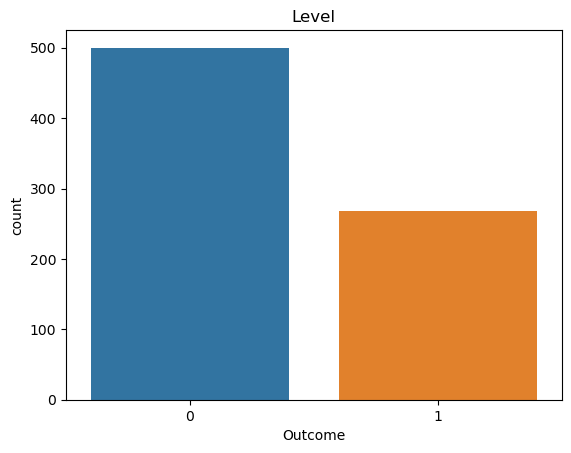

In [8]:
import seaborn as sns
sns.countplot(x='Outcome', data=df)
plt.title('Level')
plt.show()

<Axes: xlabel='Outcome', ylabel='BMI'>

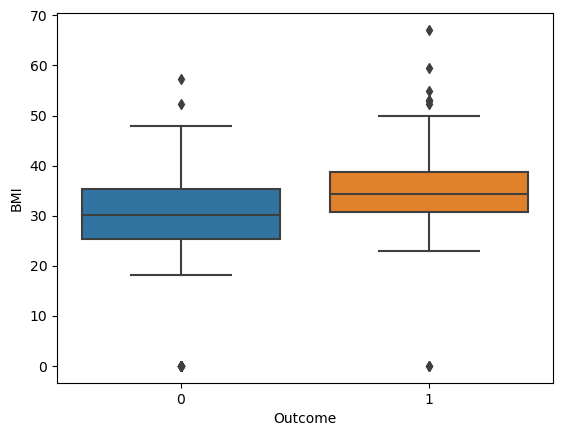

In [9]:
sns.boxplot(data = df,x = "Outcome", y = "BMI")

In [10]:
# Renaming DiabetesPedigreeFunction as DPF
df = df.rename(columns={'DiabetesPedigreeFunction':'DPF'})

Text(0.5, 1.0, 'Diabetes Variable Correlations')

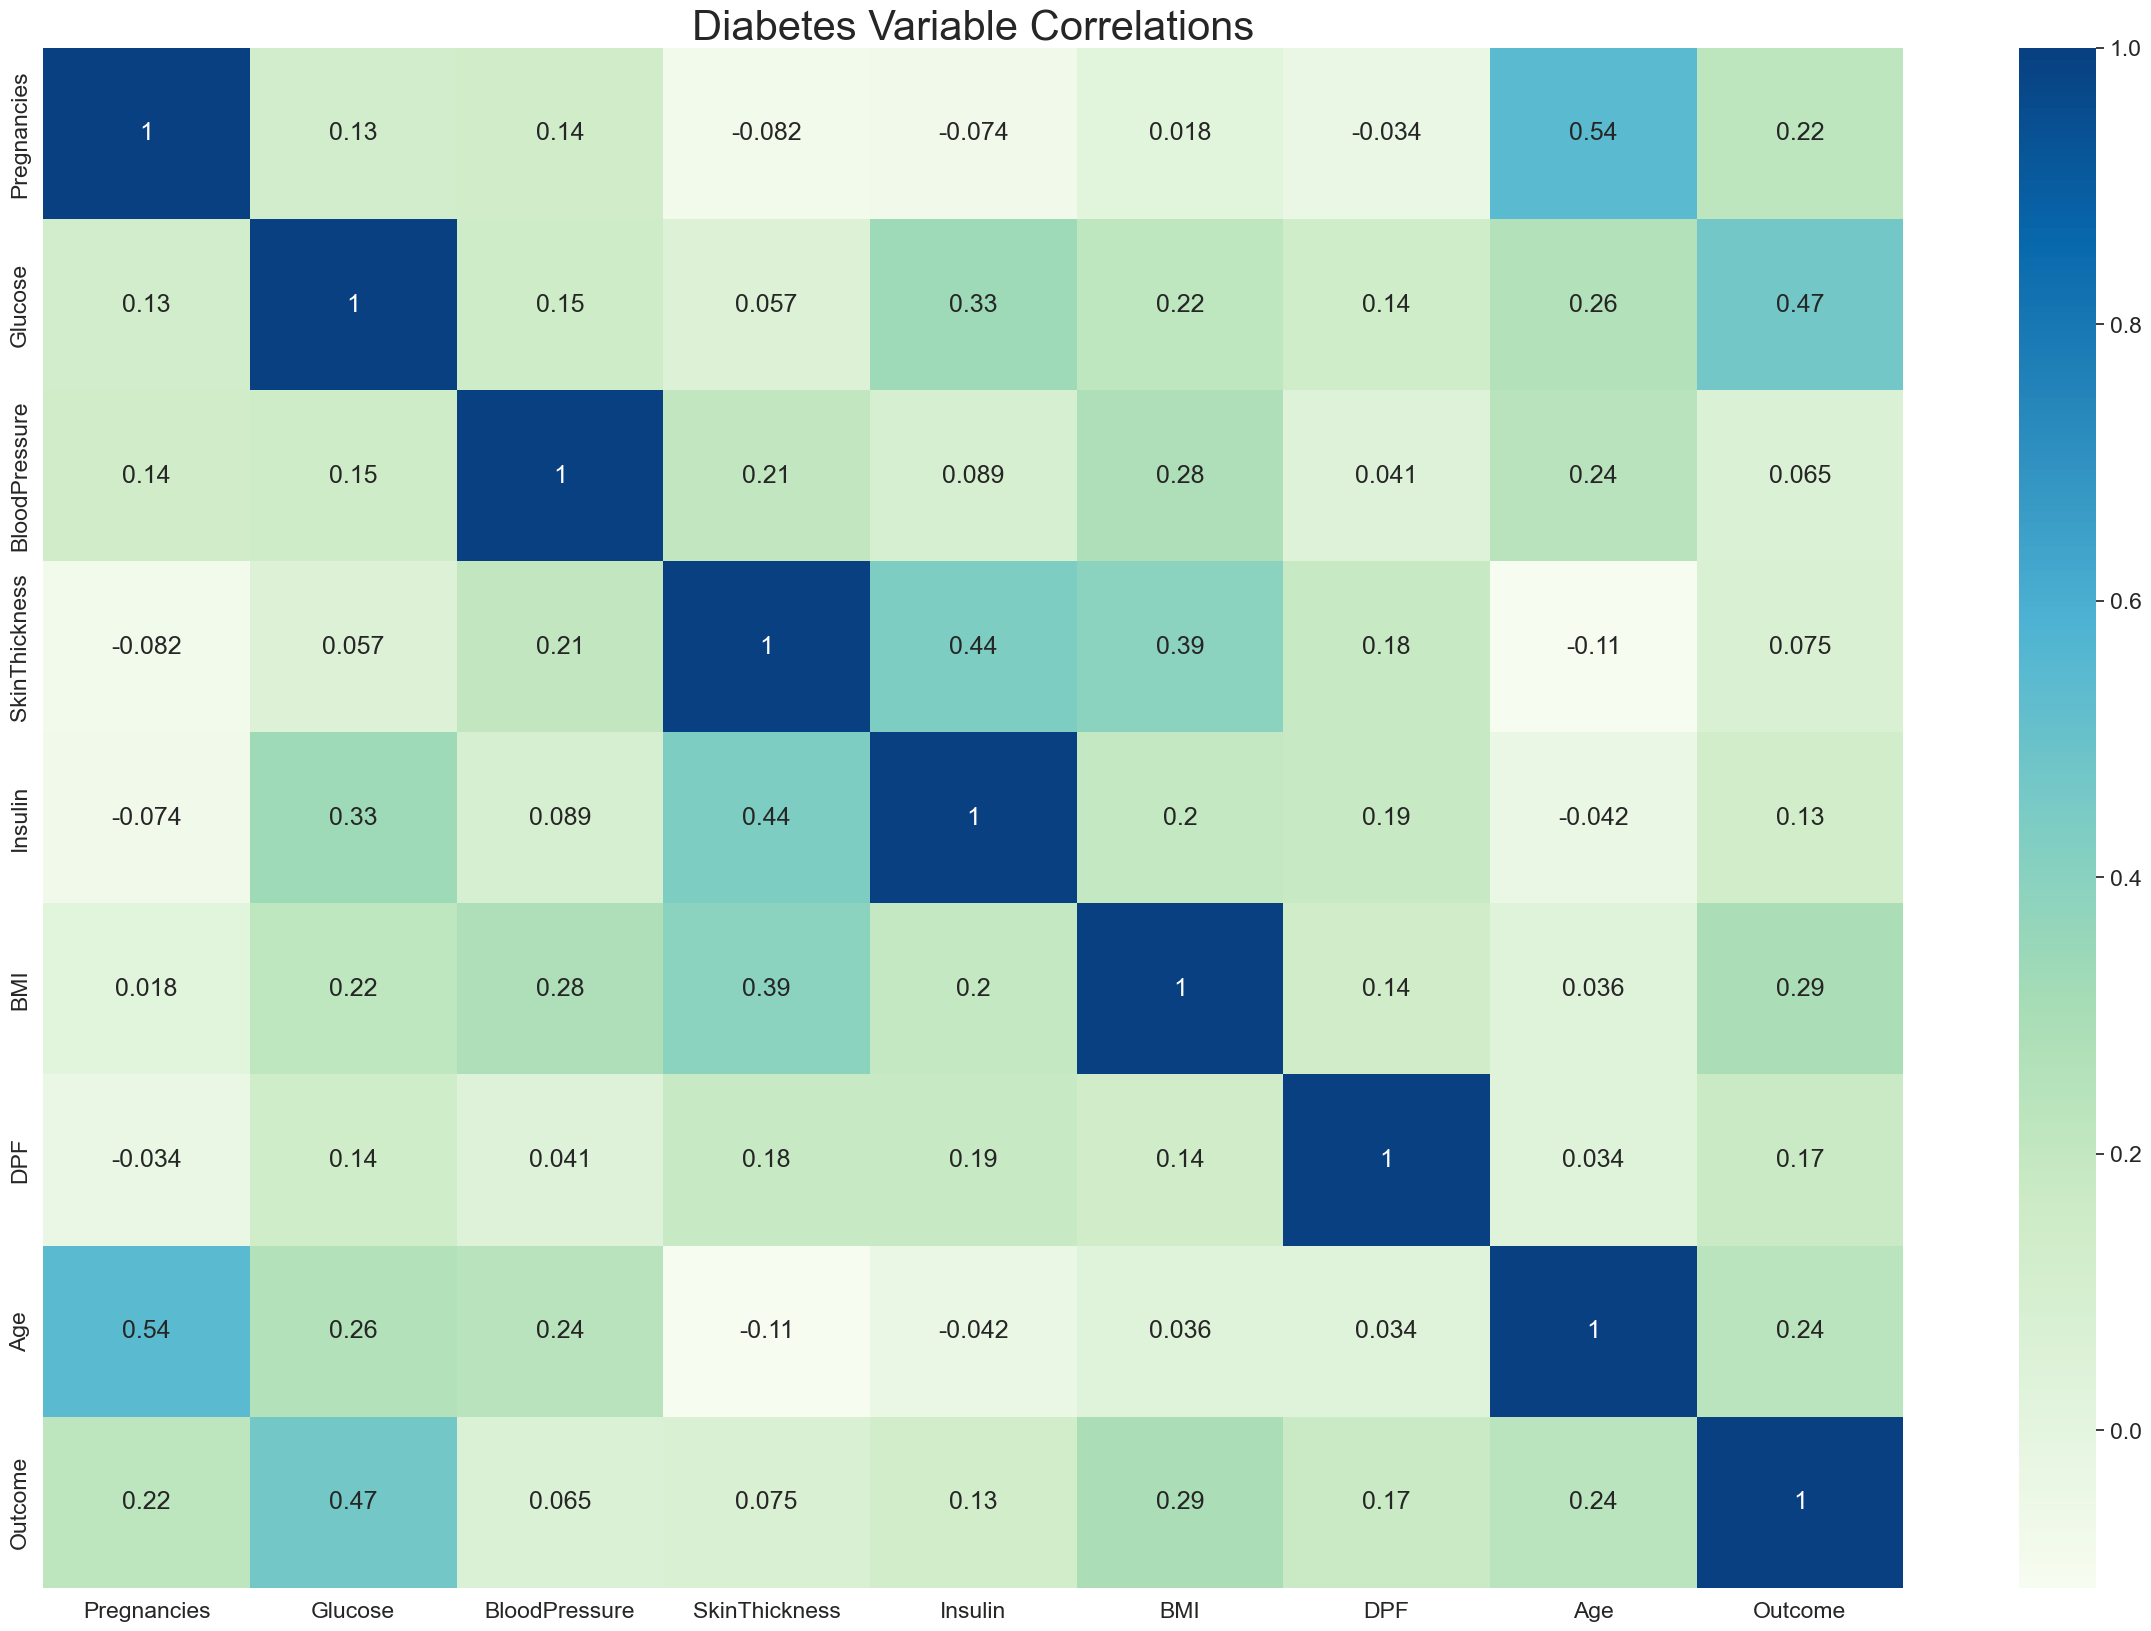

In [11]:
plt.figure(figsize = (30,20))
sns.set(font_scale=1.5)
sns.heatmap(df.corr(),annot=True, cmap='GnBu')
plt.title("Diabetes Variable Correlations",fontsize=30)

In [12]:
# Replacing the 0 values from ['Glucose','BloodPressure','SkinThickness','Insulin','BMI'] by NaN
df_copy = df.copy(deep=True)
df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [13]:
# Replacing NaN value by mean, median depending upon distribution
df_copy['Glucose'].fillna(df_copy['Glucose'].mean(), inplace=True)
df_copy['BloodPressure'].fillna(df_copy['BloodPressure'].mean(), inplace=True)
df_copy['SkinThickness'].fillna(df_copy['SkinThickness'].median(), inplace=True)
df_copy['Insulin'].fillna(df_copy['Insulin'].median(), inplace=True)
df_copy['BMI'].fillna(df_copy['BMI'].median(), inplace=True)

In [14]:
# Model Building
from sklearn.model_selection import train_test_split
X = df.drop(columns='Outcome')
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    768 non-null    int64  
 1   Glucose        768 non-null    int64  
 2   BloodPressure  768 non-null    int64  
 3   SkinThickness  768 non-null    int64  
 4   Insulin        768 non-null    int64  
 5   BMI            768 non-null    float64
 6   DPF            768 non-null    float64
 7   Age            768 non-null    int64  
 8   Outcome        768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [16]:
X=df.drop('Outcome',axis=1)
Y=df['Outcome']

In [17]:
Y.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [18]:
from imblearn.under_sampling import NearMiss
nm = NearMiss(version = 1,n_neighbors=5)
x_sm,y_sm=nm.fit_resample(X,Y)

In [19]:
y_sm.shape , x_sm.shape

((536,), (536, 8))

In [20]:
y_sm.value_counts()

Outcome
0    268
1    268
Name: count, dtype: int64

In [21]:
X_train , X_test , Y_train , Y_test = train_test_split(x_sm,y_sm, test_size=0.3 , random_state=42)

In [22]:
for x in [X_train, X_test, Y_train, Y_test]:
    print(len(x))

375
161
375
161


In [23]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


grid_models = [
    (KNeighborsClassifier(), [{'n_neighbors': [8, 10, 13], 'weights': ['uniform', 'distance'], 'algorithm': ['auto', 'ball_tree', 'brute']}]),
    (DecisionTreeClassifier(), [{'criterion': ['gini', 'entropy', 'log_loss'], 'min_samples_leaf': [4, 5, 6], 'max_depth': [8, 10, 13]}]),
    (RandomForestClassifier(), [{'n_estimators': [50, 100, 150, 200], 'max_depth': [8, 10, 13], 'criterion': ['gini', 'entropy'], 'max_features': [1, 3, 5]}])
]

In [24]:
for i,j in grid_models:
    grid = GridSearchCV(estimator=i,param_grid = j, scoring = 'accuracy',cv=2)
    grid.fit(X_train, Y_train)
    best_accuracy = grid.best_score_
    best_param = grid.best_params_
    print('{}:\nBest Accuracy : {:.2f}%'.format(i,best_accuracy*100))
    print('Best Parameters : ',best_param)
    print('')
    print('----------------')
    print('')

KNeighborsClassifier():
Best Accuracy : 70.93%
Best Parameters :  {'algorithm': 'auto', 'n_neighbors': 10, 'weights': 'distance'}

----------------

DecisionTreeClassifier():
Best Accuracy : 70.66%
Best Parameters :  {'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 4}

----------------

RandomForestClassifier():
Best Accuracy : 74.93%
Best Parameters :  {'criterion': 'gini', 'max_depth': 8, 'max_features': 3, 'n_estimators': 100}

----------------



# KNN

In [25]:
knn = KNeighborsClassifier(algorithm='auto',n_neighbors=13, weights='uniform')
knn.fit(X_train , Y_train)

KNeighborsClassifier(n_neighbors=13)

In [26]:
# make predictions on test set
y_pred=knn.predict(X_test)

print('Training set score: {:.4f}'.format(knn.score(X_train, Y_train)))

print('Test set score: {:.4f}'.format(knn.score(X_test, Y_test)))

Training set score: 0.7600
Test set score: 0.6708


In [27]:
from sklearn.metrics import mean_squared_error
import math  # Import math module if not already imported

# Assuming Y_test and y_pred are defined
mse = mean_squared_error(Y_test, y_pred)
print('Mean Squared Error: ' + str(mse))

rmse = math.sqrt(mse)
print('Root Mean Squared Error: ' + str(rmse))

Mean Squared Error: 0.32919254658385094
Root Mean Squared Error: 0.5737530362306164


In [29]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
matrix = classification_report(Y_test,y_pred )
print(matrix)

              precision    recall  f1-score   support

           0       0.63      0.72      0.67        76
           1       0.72      0.62      0.67        85

    accuracy                           0.67       161
   macro avg       0.67      0.67      0.67       161
weighted avg       0.68      0.67      0.67       161



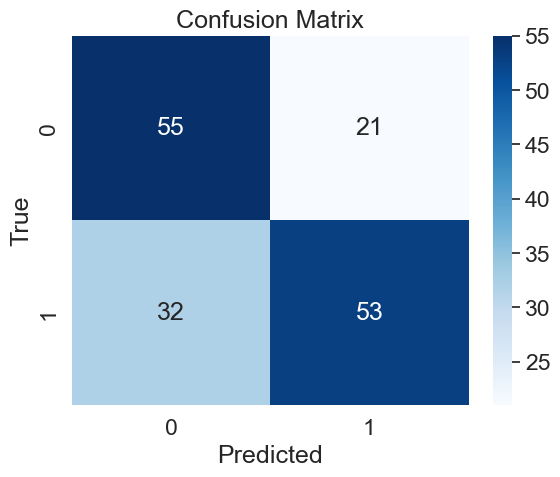

In [30]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

# Assuming Y_test and y_pred are defined
plot_confusion_matrix(Y_test, y_pred)


# Decision Tree

In [31]:
dt = DecisionTreeClassifier(criterion='gini',max_depth=13,min_samples_leaf=5)
dt.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=13, min_samples_leaf=5)

In [32]:
# Make predictions on test data
y_pred=dt.predict(X_test)
print('Training set score: {:.4f}'.format(dt.score(X_train,Y_train)))

print('Test set score: {:.4f}'.format(dt.score(X_train,Y_train)))

Training set score: 0.8667
Test set score: 0.8667


In [33]:
# Check MSE and RSME
mse=mean_squared_error(Y_test,y_pred)
print('Mean Squared Error : '+str(mse))

rmse=math.sqrt(mse)
print('Mean Squared Error :'+str(rmse))

Mean Squared Error : 0.34782608695652173
Mean Squared Error :0.5897678246195885


In [34]:
# Create Decision Tree Classification Report
matrix = classification_report(Y_test,y_pred )
print(matrix)

              precision    recall  f1-score   support

           0       0.63      0.63      0.63        76
           1       0.67      0.67      0.67        85

    accuracy                           0.65       161
   macro avg       0.65      0.65      0.65       161
weighted avg       0.65      0.65      0.65       161



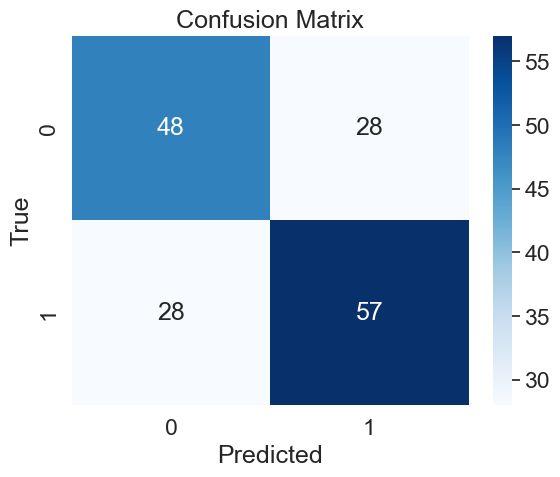

In [35]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

# Assuming Y_test and y_pred are defined
plot_confusion_matrix(Y_test, y_pred)


# Random Forest

In [36]:
rf = RandomForestClassifier(max_depth=13, criterion='gini', n_estimators =200, min_samples_leaf=5, random_state=42)
rf.fit(X_train, Y_train)

RandomForestClassifier(max_depth=13, min_samples_leaf=5, n_estimators=200,
                       random_state=42)

In [37]:
# Make predictions on test set
y_pred=rf.predict(X_test)

print('Training set score: {:.4f}'.format(rf.score(X_train, Y_train)))

print('Test set score: {:.4f}'.format(rf.score(X_test, Y_test)))

Training set score: 0.8693
Test set score: 0.7329


In [38]:
# Check MSE & RMSE
mse =mean_squared_error(Y_test, y_pred)
print('Mean Squared Error : '+ str(mse))
rmse = math.sqrt(mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error : '+ str(rmse))

Mean Squared Error : 0.2670807453416149
Root Mean Squared Error : 0.5167985539275578


In [39]:
matrix = classification_report(Y_test,y_pred )
print(matrix)

              precision    recall  f1-score   support

           0       0.70      0.76      0.73        76
           1       0.77      0.71      0.74        85

    accuracy                           0.73       161
   macro avg       0.73      0.73      0.73       161
weighted avg       0.74      0.73      0.73       161



In [ ]:
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

# Assuming Y_test and y_pred are defined
plot_confusion_matrix(Y_test, y_pred)


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
pipeline_lr = Pipeline([('scaler', StandardScaler()),
                        ('lr_classifier', KNeighborsClassifier())])

In [ ]:
pipeline_dt = Pipeline([('scaler', StandardScaler()),
                        ('dt_classifier', DecisionTreeClassifier())])

In [ ]:
pipeline_rf = Pipeline([('scaler', StandardScaler()),
                        ('rf_classifier', RandomForestClassifier())])

In [ ]:
# List of pipelines for ease of iteration
pipelines = [pipeline_lr, pipeline_dt, pipeline_rf]

In [ ]:
# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'Random Forest'}

In [ ]:
# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, Y_train)

In [ ]:
# Compare accuracies
for i,model in enumerate(pipelines):
    print("{} Test Accuracy: {}".format(pipe_dict[i],model.score(X_test,Y_test)))

#Model Building

In [ ]:
# Creating Random Forest Model
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=20)
classifier.fit(X_train, Y_train)

In [ ]:
# Creating a pickle file for the classifier
filename = 'diabetes-prediction-rfc-model.pkl'
pickle.dump(classifier, open(filename, 'wb'))